In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from random import randrange
from datetime import datetime

sns.set_style('whitegrid')

In [4]:
def severity_generator(notice_pct_dist, notice_pct_loss_dist, severity_dist):
    notice_pct = np.random.choice(notice_pct_dist)
    notice_pct_loss = np.random.choice(notice_pct_loss_dist)
    low_severity_pct = np.random.choice(severity_dist)
    med_high_severity_pct_generator = np.random.random(1)[0]
    med_severity_pct = (1 - low_severity_pct) * (med_high_severity_pct_generator)
    high_severity_pct = (1 - low_severity_pct) * (1-med_high_severity_pct_generator)
    
    return notice_pct, notice_pct_loss, low_severity_pct, med_severity_pct, high_severity_pct
    
    
notice_pct_dist = np.random.triangular(.05, .15, .25, 100_000)
notice_pct_loss_dist = np.random.triangular(.15, .25, .35, 100_000)
severity_dist = np.random.triangular(.65, .7, .75, 100_000)

notice_pct, notice_pct_loss, low_severity_pct, med_severity_pct, high_severity_pct = severity_generator(notice_pct_dist, notice_pct_loss_dist, severity_dist)

In [5]:
notice_pct, notice_pct_loss, low_severity_pct, med_severity_pct, high_severity_pct

(0.16835492813687486,
 0.19538080906718197,
 0.673233277441627,
 0.16216725233197377,
 0.16459947022639926)

In [6]:
def DV_generator(deal_count, DV_range, sme_low_DV, sme_upper_DV, mm_low_DV, mm_upper_DV, sme_pct, mm_pct, j_pct):
    DV_list = []
    sme_count = int(deal_count*sme_pct)
    mm_count = int(deal_count*mm_pct)
    j_count = int(deal_count*j_pct)
    for x in range(sme_count):
        DV_list.append(random.randrange(sme_low_DV, sme_upper_DV, DV_range)) 
    for x in range(mm_count):
        DV_list.append(random.randrange(mm_low_DV, mm_upper_DV, DV_range)) 
    for x in range(j_count):
        DV_list.append(random.randrange(j_low_DV, j_upper_DV, DV_range))  
    if (sme_count + mm_count + j_count) != deal_count:
        for i in range(deal_count - len(DV_list)):
            x = random.randrange(1, 4)
            if x == 1:
                DV_list.append(random.randrange(sme_low_DV, sme_upper_DV, DV_range)) 
            if x == 2:
                DV_list.append(random.randrange(mm_low_DV, mm_upper_DV, DV_range))
            if x == 3:
                DV_list.append(random.randrange(j_low_DV, j_upper_DV, DV_range))
    random.shuffle(DV_list)
    
    return DV_list

deal_count = 10
DV_range = 2_500_000
sme_low_DV, sme_upper_DV = 10_000_000, 75_000_000
mm_low_DV, mm_upper_DV = 75_000_000, 750_000_000
j_low_DV, j_upper_DV = 750_000_000, 5_000_000_000
sme_pct = .25
mm_pct = .35
j_pct = .40

DV_list = DV_generator(deal_count, DV_range, sme_low_DV, sme_upper_DV, mm_low_DV, mm_upper_DV, sme_pct, mm_pct, j_pct)

In [7]:
len(DV_list)

10

In [8]:
def structure_generator(DV_list, low_limit, upper_limit, limit_range, primary_pct, xs_pct, pri_attachment_pt_range):
    primary_xs_list = []
    for dv in DV_list:
        if dv > 750_000_000:
            x = np.random.choice([0, 1], size=1, p=[primary_pct, xs_pct])
            primary_xs_list.append(x[0])
        else:
            primary_xs_list.append(0)
            
    tower_limit_list = []
    for value in DV_list:
        tower_limit_list.append(random.randrange(value*.1, value*.2, 500_000)) 
    
    limit_list = []
    for index, tower_limit in enumerate(tower_limit_list):
        policy_limit = random.randrange(low_limit, upper_limit, limit_range)
        if policy_limit >= tower_limit_list[index]:
            policy_limit = tower_limit_list[index]
            limit_list.append(policy_limit)
        if policy_limit < tower_limit_list[index]:
            limit_list.append(policy_limit) 
        
    attachment_pt_list = []        
    for index, pri_v_xs in enumerate(primary_xs_list):
        if pri_v_xs == 0:
            y = np.random.choice(pri_attachment_pt_range, size=1)
            attachment_pt_list.append(y[0])
        if pri_v_xs == 1:
            layer_num = int(tower_limit_list[index] // limit_list[index])
            y = np.random.choice(pri_attachment_pt_range, size=1)
            z = y + ((random.randrange(1, layer_num+1)*limit_list[index])/DV_list[index])
            attachment_pt_list.append(z[0])

    return limit_list, attachment_pt_list, primary_xs_list

primary_pct = .5
xs_pct = .5    
pri_attachment_pt_range = np.arange(0.0025, 0.005, 0.0005)

low_limit = 30_000_000
upper_limit = 50_000_000
limit_range = 2_500_000

limit_list, attachment_pt_list, primary_xs_list = structure_generator(DV_list, low_limit, upper_limit, limit_range, primary_pct, xs_pct, pri_attachment_pt_range)

/var/folders/6b/jdlfkyk94cx509cpcvq9qfx00000gn/T/ipykernel_83621/457249430.py:12: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  tower_limit_list.append(random.randrange(value*.1, value*.2, 500_000))


In [9]:
len(limit_list), len(attachment_pt_list), len(primary_xs_list)

(10, 10, 10)

In [10]:
def pricing_generator(DV_list, limit_list, attachment_pt_list, primary_xs_list, pricing_range, sme_pricing_low, sme_pricing_high, mm_pricing_low, mm_pricing_high, j_pricing_low, j_pricing_high):
    pricing_list = []
    for index, DV in enumerate(DV_list):
        if DV > 9_999_999 and DV < 75_000_001:
            pricing_list.append(round(random.uniform(sme_pricing_low, sme_pricing_high), 4)) 
        if DV > 75_000_000 and DV < 750_000_001:
            pricing_list.append(round(random.uniform(mm_pricing_low, mm_pricing_high), 4)) 
        if DV > 750_000_000 and primary_xs_list[index] == 1:
            attachment_pt = DV_list[index] * attachment_pt_list[index]
            ilf_mult = int(attachment_pt // limit_list[index]) 
            ilf_np_array = np.random.choice(np.arange(.75, .85, .025), size=ilf_mult)
            ilf = np.prod(ilf_np_array)
            xs_pricing = ilf * round(random.uniform(mm_pricing_low, mm_pricing_high), 4)
            pricing_list.append(xs_pricing)
        if DV > 750_000_000 and primary_xs_list[index] == 0:
            pricing_list.append(round(random.uniform(j_pricing_low, j_pricing_high), 4)) 

    return pricing_list

pricing_range = .05
sme_pricing_low, sme_pricing_high = .01, .0125
mm_pricing_low, mm_pricing_high = .0135, .015
j_pricing_low, j_pricing_high = .035, .075

pricing_list = pricing_generator(DV_list, limit_list, attachment_pt_list, primary_xs_list, pricing_range, sme_pricing_low, sme_pricing_high, mm_pricing_low, mm_pricing_high, j_pricing_low, j_pricing_high)

In [11]:
len(pricing_list)

10

In [12]:
def notice_generator(deal_count, notice_pct, notice_pct_loss, low_severity_pct, med_severity_pct, high_severity_pct):
    notice_list = []
    for x in range(int(deal_count*notice_pct*notice_pct_loss)):
        notice_list.append(1)
    for x in range(int(deal_count*notice_pct*notice_pct_loss*low_severity_pct)):
        notice_list.append(2)
    for x in range(int(deal_count*notice_pct*notice_pct_loss*med_severity_pct)):
        notice_list.append(3)
    for x in range(int(deal_count*notice_pct*notice_pct_loss*high_severity_pct)):
        notice_list.append(4)
    for x in range(int(deal_count*(1-notice_pct))):
        notice_list.append(0)
    if deal_count - len(notice_list) > 0:
        for x in range(deal_count - len(notice_list)):
            notice_list.append(randrange(5))
    if deal_count - len(notice_list) < 0:
        for x in range(abs(deal_count - len(notice_list))):
            notice_list.pop(randrange(len(notice_list)))
    random.shuffle(notice_list)
    
    return notice_list 

notice_list = notice_generator(deal_count, notice_pct, notice_pct_loss, low_severity_pct, med_severity_pct, high_severity_pct)

In [13]:
len(notice_list)

10

In [14]:
def loss_generator(notice_list, limit_list, low_low_severity_loss, low_high_severity_loss, med_low_severity_loss, med_high_severity_loss):
    loss_list = []
    for index, notice in enumerate(notice_list):
        if notice == 0:
            loss_list.append(0) 
        if notice == 1:
            loss_list.append(0) 
        if notice == 2:
            loss_list.append(random.randrange(low_low_severity_loss, low_high_severity_loss)) 
        if notice == 3:
            loss_list.append(random.randrange(med_low_severity_loss, med_high_severity_loss))
        if notice == 4:
            if limit_list[index] > 10_000_000:
                loss_list.append(random.randrange(high_low_severity_loss, limit_list[index]))
            else:
                loss_list.append(random.randrange(high_low_severity_loss, 10_000_001))
    
    return loss_list

low_low_severity_loss, low_high_severity_loss = 0, 1_000_000
med_low_severity_loss, med_high_severity_loss = 1_000_000, 10_000_000
high_low_severity_loss = 10_000_000

loss_list = loss_generator(notice_list, limit_list, low_low_severity_loss, low_high_severity_loss, med_low_severity_loss, med_high_severity_loss)

In [15]:
len(loss_list)

10

In [16]:
def performance(df):
    if df['Attachment_Pt'] - df['Loss_Amount'] >= 0:
            df['Performance'] = df['Premium']
    if df['Attachment_Pt'] - df['Loss_Amount'] <= 0:
        df['Performance'] = df['Premium'] + df['Attachment_Pt'] - df['Loss_Amount']
    return df['Performance']

def df_generator(DV_list,pricing_list,attachment_pt_list,notice_list,loss_list,limit_list):
    data_tuples = list(zip(DV_list,pricing_list,attachment_pt_list,notice_list,loss_list,limit_list))
    df = pd.DataFrame(data_tuples, columns=['DV','RoL','Attachment_Pt_Pct','Notice','Loss_Amount','Limit'])
    df['Premium'] = df['Limit'] * df['RoL']
    df['Attachment_Pt'] = df['DV']*df['Attachment_Pt_Pct']
    df['Performance'] = df.apply(performance, axis=1)
    return df

In [17]:
def formatted(number):
    return ("{:,}".format(number))

/var/folders/6b/jdlfkyk94cx509cpcvq9qfx00000gn/T/ipykernel_83621/457249430.py:12: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  tower_limit_list.append(random.randrange(value*.1, value*.2, 500_000))
/var/folders/6b/jdlfkyk94cx509cpcvq9qfx00000gn/T/ipykernel_83621/457249430.py:12: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  tower_limit_list.append(random.randrange(value*.1, value*.2, 500_000))
/var/folders/6b/jdlfkyk94cx509cpcvq9qfx00000gn/T/ipykernel_83621/457249430.py:12: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  tower_limit_list.append(random.randrange(value*.1, value*.2, 500_000))
/var/folders/6b/jdlfkyk94cx509cpcvq9qfx00000gn/T/ipykernel_83621/457249430.py:12: DeprecationWarning: non-integer a

Percentage of scenarios above 0: 0.642
Percentage of scenarios above 1m: 0.629
Percentage of scenarios above 10m: 0.507
Average: 6255332
Max: 51814548
Min: -99057332


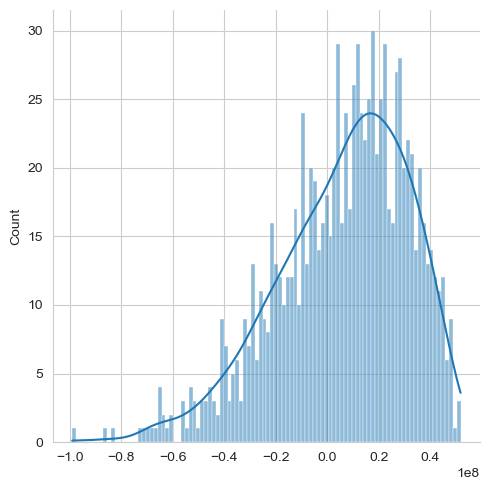

In [18]:
num_simulations = 1_000
performance_stats = []

notice_pct_dist = np.random.triangular(.05, .15, .25, 100_000)
notice_pct_loss_dist = np.random.triangular(.15, .25, .35, 100_000)
severity_dist = np.random.triangular(.65, .75, .85, 100_000)

deal_count = 100
DV_range = 2_500_000
sme_low_DV, sme_upper_DV = 10_000_000, 75_000_000
mm_low_DV, mm_upper_DV = 75_000_000, 750_000_000
j_low_DV, j_upper_DV = 750_000_000, 5_000_000_000
sme_pct = .35
mm_pct = .55
j_pct = .1

primary_pct = .7
xs_pct = .3    
pri_attachment_pt_range = np.arange(0.0025, 0.005, 0.0005)
xs_attachment_pt_range = np.arange(0.05, 0.15, 0.025)

pricing_range = .05
sme_pricing_low, sme_pricing_high = .012, .0145
mm_pricing_low, mm_pricing_high = .0135, .0165
j_pricing_low, j_pricing_high = .035, .075

low_limit = 30_000_000
upper_limit = 50_000_000
limit_range = 2_500_000

low_low_severity_loss, low_high_severity_loss = 0, 1_000_000
med_low_severity_loss, med_high_severity_loss = 1_000_000, 10_000_000
high_low_severity_loss = 10_000_000

for i in range(num_simulations):
    
    notice_pct, notice_pct_loss, low_severity_pct, med_severity_pct, high_severity_pct = severity_generator(notice_pct_dist, notice_pct_loss_dist, severity_dist)
    DV_list = DV_generator(deal_count, DV_range, sme_low_DV, sme_upper_DV, mm_low_DV, mm_upper_DV, sme_pct, mm_pct, j_pct)
    limit_list, attachment_pt_list, primary_xs_list = structure_generator(DV_list, low_limit, upper_limit, limit_range, primary_pct, xs_pct, pri_attachment_pt_range)
    pricing_list = pricing_generator(DV_list, limit_list, attachment_pt_list, primary_xs_list, pricing_range, sme_pricing_low, sme_pricing_high, mm_pricing_low, mm_pricing_high, j_pricing_low, j_pricing_high)
    notice_list = notice_generator(deal_count, notice_pct, notice_pct_loss, low_severity_pct, med_severity_pct, high_severity_pct)
    loss_list = loss_generator(notice_list, limit_list, low_low_severity_loss, low_high_severity_loss, med_low_severity_loss, med_high_severity_loss)
    df = df_generator(DV_list, pricing_list, attachment_pt_list, notice_list, loss_list, limit_list)
    performance_stats.append(df['Performance'].sum().round(0))
sns.displot(performance_stats, bins=100, kde=True);

print('Percentage of scenarios above 0:', len([i for i in performance_stats if i > 0])/len(performance_stats))
print('Percentage of scenarios above 1m:', len([i for i in performance_stats if i > 1_000_000])/len(performance_stats))
print('Percentage of scenarios above 10m:', len([i for i in performance_stats if i > 10_000_000])/len(performance_stats))
print('Average:', round(sum(performance_stats)/len(performance_stats)))
print('Max:', round(max(performance_stats)))
print('Min:', round(min(performance_stats)))